# Data Playbook

## Library

In [20]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [21]:
# Importamos el Activity_Event_
with open('data_sources/simulation/body_health/summary/body_summary.json') as file:
    body_summary_file = json.load(file)

with open('data_sources/simulation/physical_health/summary/physical_summary.json') as file:
    physical_summary_file = json.load(file)
    
with open('data_sources/simulation/physical_health/events/activity_event.json') as file:
    physical_event_file = json.load(file)

with open('data_sources/simulation/sleep_health/sleep_summary.json') as file:
    sleep_summary_file = json.load(file)

## Body Summary

### Body Metrics

In [22]:
weight_kg = body_summary_file['body_health']['summary']['body_summary']['body_metrics']['weight_kg_float']
height_cm = body_summary_file['body_health']['summary']['body_summary']['body_metrics']['height_cm_int']
bmi = body_summary_file['body_health']['summary']['body_summary']['body_metrics']['bmi_float']
waist_circumference = body_summary_file['body_health']['summary']['body_summary']['body_metrics']['waist_circumference_cm_int']
hip_circumference = body_summary_file['body_health']['summary']['body_summary']['body_metrics']['hip_circumference_cm_int']


# Check weight
if weight_kg is None:
    weight_result = "Weight: No values ​​were obtained or it is null."

else:
    weight_result = f"Weight: {weight_kg} kg."

# Check height    
if height_cm is None:
    height_result = "Height: No values ​​were obtained or it is null."

else:
    height_meters = round(height_cm/100, 2)
    height_result = f"Height: {height_meters} m."
    
# Check BMI    
if bmi is None:
    if weight_kg is not None and weight_kg > 0 and height_cm is not None and height_cm > 0:
        height_meters = height_cm / 100
        bmi = weight_kg / (height_meters ** 2)
        if bmi < 18.5:
            bmi_result = f"BMI: {bmi:.2f}. Is Underweight."
        elif bmi < 25:
            bmi_result = f"BMI: {bmi:.2f}. Is Normal."
        elif bmi < 30:
            bmi_result = f"BMI: {bmi:.2f}. Is Overweight."
        elif bmi < 35:
            bmi_result = f"BMI: {bmi:.2f}. Is Obese."
        else:
            bmi_result = f"BMI: {bmi:.2f}. Is Extremelly Obese"
    else:
        bmi_result = "BMI: No values ​​were obtained or it is null."
    

else:
    if bmi < 18.5:
        bmi_result = f"BMI: {bmi}. Is Underweight."
    elif bmi < 25:
        bmi_result = f"BMI: {bmi}. Is Normal."
    elif bmi < 30:
        bmi_result = f"BMI: {bmi}. Is Overweight."
    elif bmi < 35:
        bmi_result = f"BMI: {bmi}. Is Obese."
    else:
        bmi_result = f"BMI: {bmi}. Is "
    
# Check Waist
if waist_circumference is None:
    waist_circumference_result = "Waist: No values ​​were obtained or it is null."

else:
    waist_circumference_result = f"Waist: {waist_circumference} cm."
    
# Check hip
if hip_circumference is None:
    hip_circumference_result = "Hip: No values ​​were obtained or it is null."

else:
    hip_circumference_result = f"Hip: {hip_circumference} cm."
    

# Print
print(weight_result)
print(height_result)
print(bmi_result)
print(waist_circumference_result)
print(hip_circumference_result)

Weight: 66.0 kg.
Height: 1.7 m.
BMI: 22.0. Is Normal.
Waist: No values ​​were obtained or it is null.
Hip: No values ​​were obtained or it is null.


### Blood Metrics

In [23]:
blood_glucose = body_summary_file['body_health']['summary']['body_summary']['blood_glucose']['blood_glucose_avg_mg_per_dL_int']
blood_pressure = body_summary_file['body_health']['summary']['body_summary']['blood_pressure']['blood_pressure_avg_object']
saturation = body_summary_file['body_health']['summary']['body_summary']['oxygenation']['saturation_avg_percentage_int']
vo2max = body_summary_file['body_health']['summary']['body_summary']['oxygenation']['vo2max_mL_per_min_per_kg_int']

# Blood Pressure
if not blood_pressure:
    blood_pressure_result = "Blood Pressure: No values ​​were obtained or it is null."

else:
    blood_pressure_systolic = body_summary_file['body_health']['summary']['body_summary']['blood_pressure']['blood_pressure_avg_object']['systolic_mmHg_int']
    blood_pressure_diastolic = body_summary_file['body_health']['summary']['body_summary']['blood_pressure']['blood_pressure_avg_object']['diastolic_mmHg_int']
    blood_pressure_result = f'Blood pressure systolic: {blood_pressure_systolic}. Blood pressure diastolic: {blood_pressure_diastolic}.'
    
# Blood Glucose
if blood_glucose is None:
    blood_glucose_result = "Blood glucose: No values ​​were obtained or it is null."

else:
    blood_glucose_result = f'Blood glucose: {blood_glucose}'
    
# Saturation
if saturation is None:
    saturation_result = "Saturation: No values ​​were obtained or it is null."
    
else:
    saturation_result = f'Saturation: {saturation}%'
    
# vo2max
if vo2max is None:
    vo2max_result = "vo2max: No values ​​were obtained or it is null."

else:
    vo2max_result = f"vo2max: {vo2max}."
    
print(blood_pressure_result)
print(blood_glucose_result)
print(saturation_result)
print(vo2max_result)

Blood pressure systolic: 120. Blood pressure diastolic: 80.
Blood glucose: No values ​​were obtained or it is null.
Saturation: 97%
vo2max: 45.


### Hydration

In [24]:
hydration = body_summary_file['body_health']['summary']['body_summary']['hydration']['water_total_consumption_mL_int']

# Saturation
if hydration is None:
    hydration_result = "Hydration: No values ​​were obtained or it is null."
    
else:
    hydration_result = f'Hydration: {hydration}%'
    
print(hydration_result)

Hydration: 3300%


### Nutrition

In [25]:
calories_intake = body_summary_file['body_health']['summary']['body_summary']['nutrition']['calories_intake_kcal_float']
protein_intake = body_summary_file['body_health']['summary']['body_summary']['nutrition']['protein_intake_g_float']
fat_intake = body_summary_file['body_health']['summary']['body_summary']['nutrition']['fat_intake_g_float']
carbohydrates_intake = body_summary_file['body_health']['summary']['body_summary']['nutrition']['carbohydrates_intake_g_float']

# Calories
if calories_intake is None:
    calories_intake_result = "Calories Intake: No values ​​were obtained or it is null."
    
else:
    calories_intake_result = f'Calories Intake: {calories_intake}.'

# Protein
if protein_intake is None:
    protein_intake_result = "Protein Intake: No values ​​were obtained or it is null."
    
else:
    protein_intake_result = f'Protein Intake: {protein_intake}.'

# Fat
if fat_intake is None:
    fat_intake_result = "Fat Intake: No values ​​were obtained or it is null."
    
else:
    fat_intake_result = f'Fat Intake: {fat_intake}.'

# Carbohydrates
if carbohydrates_intake is None:
    carbohydrates_intake_result = "Carbohydrates Intake: No values ​​were obtained or it is null."
    
else:
    carbohydrates_intake_result = f'Carbohydrates Intake: {carbohydrates_intake}.'
    
print(calories_intake_result)
print(protein_intake_result)
print(fat_intake_result)
print(carbohydrates_intake_result)

Calories Intake: 1800.0.
Protein Intake: 90.0.
Fat Intake: 60.0.
Carbohydrates Intake: 220.0.


## Sleep Summary

### Sleep Duration

In [26]:
sleep_start = sleep_summary_file['sleep_health']['summary']['sleep_summary']['duration']['sleep_start_datetime_string']
sleep_end = sleep_summary_file['sleep_health']['summary']['sleep_summary']['duration']['sleep_end_datetime_string']
sleep_duration = sleep_summary_file['sleep_health']['summary']['sleep_summary']['duration']['sleep_duration_seconds_int']
time_in_bed = sleep_summary_file['sleep_health']['summary']['sleep_summary']['duration']['time_in_bed_seconds_int']

def translate_date(fecha_str):
    month = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
    dt = datetime.fromisoformat(fecha_str.replace("Z", "+00:00"))
    return f"{month[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"

# Start Sleep
if sleep_start is None:
    sleep_start_result = "Sleep start: No values ​​were obtained or it is null."
else:
    sleep_start_translate = translate_date(sleep_start)
    sleep_start_result = f'Sleep Start: {sleep_start_translate}'

# End Sleep   
if sleep_end is None:
    sleep_end_result = "Sleep send: No values ​​were obtained or it is null."
else:
    sleep_end_translate = translate_date(sleep_end)
    sleep_end_result = f"Sleep End: {sleep_end_translate}"
    
#Duration
if sleep_duration is None or sleep_duration == 0 and time_in_bed > 0:
    time_in_bed_HHMMSS = str(timedelta(seconds=time_in_bed))
    sleep_duration_result = f"Time in bed: {time_in_bed_HHMMSS}"
    
elif sleep_duration is None or sleep_duration == 0:
    sleep_duration_result = "Duration: No values ​​were obtained or it is null."

else:
    sleep_duration_HHMMSS = str(timedelta(seconds=sleep_duration))
    sleep_duration_result = f'Duration: {sleep_duration}.'
    
    
print(sleep_start_result)
print(sleep_end_result)
print(sleep_duration_result)

Sleep Start: june 17, 2024 at 22:23
Sleep End: june 18, 2024 at 05:00
Duration: 22470.


### Quality of Sleep

In [27]:
sleep_quality = sleep_summary_file['sleep_health']['summary']['sleep_summary']['scores']['sleep_quality_rating_1_5_score_int']
breathing_sleep = sleep_summary_file['sleep_health']['summary']['sleep_summary']['breathing']['breaths_avg_per_min_int']
hrv_sleep = sleep_summary_file['sleep_health']['summary']['sleep_summary']['heart_rate']['hrv_avg_sdnn_float']

# Sleep quality
if sleep_quality is None:
    sleep_quality_result = "Sleep Quality: No values ​​were obtained or it is null."
else:
    sleep_quality_result = f'Sleep Quality: {sleep_quality}.'
    
# Sleep breathings
if breathing_sleep is None:
    breathing_sleep_result = "Breathing: No values ​​were obtained or it is null."
else:
    breathing_sleep_result = f'Breathings: {breathing_sleep}.'
    
# HRV
if hrv_sleep is None:
    hrv_sleep_result = "HRV: No values ​​were obtained or it is null."
else:
    hrv_sleep_result = f'HRV: {hrv_sleep}'
    
print(sleep_quality_result)
print(breathing_sleep_result)
print(hrv_sleep_result)

Sleep Quality: No values ​​were obtained or it is null.
Breathings: 14.
HRV: No values ​​were obtained or it is null.


### Heart Rate During Sleep

In [28]:
hr_avg_sleep = sleep_summary_file['sleep_health']['summary']['sleep_summary']['heart_rate']['hr_avg_bpm_int']
hr_maximum_sleep = sleep_summary_file['sleep_health']['summary']['sleep_summary']['heart_rate']['hr_maximum_bpm_int']
hr_minimum_sleep = sleep_summary_file['sleep_health']['summary']['sleep_summary']['heart_rate']['hr_minimum_bpm_int']

# HR avg
if hr_avg_sleep is None:
    hr_avg_sleep_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    hr_avg_sleep_result = f'Heart Rate Average: {hr_avg_sleep} bpm.'

# HR maximum
if hr_maximum_sleep is None:
    hr_maximum_sleep_result = "Heart Rate Maximum: No values ​​were obtained or it is null."
else:
    hr_maximum_sleep_result = f'Heart Rate Maximum: {hr_maximum_sleep} bpm.'
    
# HR minimum
if hr_minimum_sleep is None:
    hr_minimum_sleep_result = "Heart Rate Minimum: No values ​​were obtained or it is null."
else:
    hr_minimum_sleep_result = f'Heart Rate Minimum: {hr_minimum_sleep} bpm.'

print(hr_avg_sleep_result)
print(hr_maximum_sleep_result)
print(hr_minimum_sleep_result)

Heart Rate Average: 56 bpm.
Heart Rate Maximum: 64 bpm.
Heart Rate Minimum: 48 bpm.


## Phisycal Summary

### Summary

In [29]:
active_time = physical_summary_file['physical_health']['summary']['physical_summary']['activity']['active_seconds_int']
daily_steps = physical_summary_file['physical_health']['summary']['physical_summary']['distance']['steps_int']
daily_calories = physical_summary_file['physical_health']['summary']['physical_summary']['calories']['calories_net_active_kcal_float']
daily_distance = physical_summary_file['physical_health']['summary']['physical_summary']['distance']['traveled_distance_meters_float']

# Active Time
if active_time is None:
    active_time_result = "Active Time: No values ​​were obtained or it is null."
    
else:
    active_time_minutes = active_time // 60
    active_time_seconds = active_time % 60
    active_time_result = f"Active Time: {active_time_minutes}:{active_time_seconds}"
    
# Daily Steps
if daily_steps is None:
    daily_steps_result = "Daily Steps: No values ​​were obtained or it is null."
    
else:
    daily_steps_result = f"Daily Steps: {daily_steps} steps."
    
# Daily Calories
if daily_calories is None:
    daily_calories_result = "Calories Burned: No values ​​were obtained or it is null."
    
else:
    daily_calories_result = f"Calories Burned: {daily_calories} kcal."
    
# Daily Distance
if daily_distance is None:
    daily_distance_result = "Distance Traveled: No values ​​were obtained or it is null."
    
else:
    daily_distance_km = round(daily_distance / 1000, 3)
    daily_distance_result = f"Distance Traveled: {daily_distance_km} km."
    
print(active_time_result)
print(daily_steps_result)
print(daily_calories_result)
print(daily_distance_result)

Active Time: 200:23
Daily Steps: 10580 steps.
Calories Burned: 266.0 kcal.
Distance Traveled: 8.009 km.


### Heart Rate

In [30]:
hr_avg_physical_summary = physical_summary_file['physical_health']['summary']['physical_summary']['heart_rate']['hr_avg_bpm_int']
hr_max_physical_summary = physical_summary_file['physical_health']['summary']['physical_summary']['heart_rate']['hr_maximum_bpm_int']
hr_min_physical_summary = physical_summary_file['physical_health']['summary']['physical_summary']['heart_rate']['hr_minimum_bpm_int']

# HR avg
if hr_avg_physical_summary is None:
    hr_avg_physical_summary_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    hr_avg_physical_summary_result = f'Heart Rate Average: {hr_avg_physical_summary} bpm.'

# HR maximus
if hr_max_physical_summary is None:
    hr_max_physical_summary_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    hr_max_physical_summary_result = f'Heart Rate Maximus: {hr_max_physical_summary} bpm.'
    
# HR minimus
if hr_min_physical_summary is None:
    hr_min_physical_summary_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    hr_min_physical_summary_result = f'Heart Rate Minimus: {hr_min_physical_summary} bpm.'

print(hr_avg_physical_summary_result)
print(hr_max_physical_summary_result)
print(hr_min_physical_summary_result)

Heart Rate Average: 71 bpm.
Heart Rate Maximus: 114 bpm.
Heart Rate Minimus: 45 bpm.


### Intensity Levels

In [31]:
hr_data_physical_summary = physical_summary_file['physical_health']['summary']['physical_summary']['heart_rate']['hr_granular_data_array']
activity_start_physical_summary = datetime.fromisoformat(physical_summary_file['physical_health']['summary']['physical_summary']['metadata']['datetime_string'])

# Define the HR max and intensity categories
age = 20
hr_max = 220 - age
intensity_levels = [
    ('rest', 0, 0.5 * hr_max),
    ('low', 0.5 * hr_max, 0.6667 * hr_max),
    ('moderate', 0.6667 * hr_max, 0.8333 * hr_max),
    ('vigorous', 0.8333 * hr_max, hr_max)
]

# Initialize the intensity counters
intensity_durations = {level: 0 for level, _, _ in intensity_levels}

# Calculate durations and categorize
previous_datetime = activity_start_physical_summary
for entry in hr_data_physical_summary:
    current_datetime = datetime.fromisoformat(entry['datetime_string'])
    hr_bpm = entry['hr_bpm_int']
    
    # Calculate the time difference from the previous entry
    duration = (current_datetime - previous_datetime).total_seconds()
    
    # Categorize the HR bpm
    for level, lower_bound, upper_bound in intensity_levels:
        if lower_bound <= hr_bpm < upper_bound:
            intensity_durations[level] += duration
            break
    
    previous_datetime = current_datetime

# Calculate total duration
total_duration = sum(intensity_durations.values())

# Calculate the percentage of time spent in each intensity level
intensity_percentages_rounded = {level: round((duration / total_duration) * 100, 2) for level, duration in intensity_durations.items()}

# Create the final result with the total time in each level and the percentages
intensity_durations_hms = {level: str(timedelta(seconds=int(duration))) for level, duration in intensity_durations.items()}

# Create a DataFrame to present the results
df_result = pd.DataFrame({
    'Intensity Level': intensity_durations.keys(),
    'Total Time (HH:MM:SS)': intensity_durations_hms.values(),
    'Percentage (%)': intensity_percentages_rounded.values()
})

# Show the DataFrame
print(df_result)

  Intensity Level Total Time (HH:MM:SS)  Percentage (%)
0            rest              14:21:00           98.18
1             low               0:16:00            1.82
2        moderate               0:00:00            0.00
3        vigorous               0:00:00            0.00


## Activity Event

### Summary of Event

In [32]:
activity_type = physical_event_file['physical_health']['events']['activity_event'][0]['activity']['activity_type_name_string']
activity_start_datetime = physical_event_file['physical_health']['events']['activity_event'][0]['activity']['activity_start_datetime_string']
activity_duration = physical_event_file['physical_health']['events']['activity_event'][0]['activity']['activity_duration_seconds_int']

def translate_date(fecha_str):
    month = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
    dt = datetime.fromisoformat(fecha_str.replace("Z", "+00:00"))
    return f"{month[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"

# Activity type
if activity_type is None:
    activity_type_result = "Activity Type: No values ​​were obtained or it is null."  
else:
    activity_type_result = f'Activity Type: {activity_type}.'

# Activity start datetime
if activity_start_datetime is None:
    activity_start_datetime_result = "Start Time: No values ​​were obtained or it is null."
else:
    activity_start_datetime_translate = translate_date(activity_start_datetime)
    activity_start_datetime_result = f'Activity Start: {activity_start_datetime_translate}'

# Activity duration
if activity_duration is None:
    activity_duration_result = "Activity Duration: No values ​​were obtained or it is null."
else:
    activity_duration_minutes = activity_duration // 60
    activity_duration_seconds = activity_duration % 60
    activity_duration_result = f"Activity Duration: {activity_duration_minutes}:{activity_duration_seconds}"

print(activity_type_result)
print(activity_start_datetime_result)
print(activity_duration_result)

Activity Type: Running.
Activity Start: june 13, 2024 at 19:33
Activity Duration: 57:4


In [33]:
steps_activity_event = physical_event_file['physical_health']['events']['activity_event'][0]['distance']['steps_int']
calories_activity_event = physical_event_file['physical_health']['events']['activity_event'][0]['calories']['calories_net_active_kcal_float']
distance_activity_event = physical_event_file['physical_health']['events']['activity_event'][0]['distance']['traveled_distance_meters_float']
  
# Steps
if steps_activity_event is None:
    steps_activity_event_result = "Steps: No values ​​were obtained or it is null."
    
else:
    steps_activity_event_result = f"Steps: {steps_activity_event} steps."
    
# Calories
if calories_activity_event is None:
    calories_activity_event_result = "Calories Burned: No values ​​were obtained or it is null."
    
else:
    calories_activity_event_result = f"Calories Burned: {calories_activity_event} kcal."
    
# Distance
if distance_activity_event is None:
    distance_activity_event_result = "Distance Traveled: No values ​​were obtained or it is null."
    
else:
    distance_activity_event_km = round(distance_activity_event / 1000, 3)
    distance_activity_event_result = f"Distance Traveled: {distance_activity_event_km} km."
    
print(steps_activity_event_result)
print(calories_activity_event_result)
print(distance_activity_event_result)

Steps: 6450 steps.
Calories Burned: 298.0 kcal.
Distance Traveled: 4.775 km.


### Heart Rate during Activity Event

In [34]:
hr_avg_activity_event = physical_event_file['physical_health']['events']['activity_event'][0]['heart_rate']['hr_avg_bpm_int']
hr_max_activity_event = physical_event_file['physical_health']['events']['activity_event'][0]['heart_rate']['hr_maximum_bpm_int']
hr_min_activity_event = physical_event_file['physical_health']['events']['activity_event'][0]['heart_rate']['hr_minimum_bpm_int']

# HR avg
if hr_avg_activity_event is None:
    hr_avg_activity_event_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    hr_avg_activity_event_result = f'Heart Rate Average: {hr_avg_activity_event} bpm.'

# HR maximus
if hr_max_activity_event is None:
    hr_max_activity_event_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    hr_max_activity_event_result = f'Heart Rate Maximus: {hr_max_activity_event} bpm.'
    
# HR minimus
if hr_min_activity_event is None:
    hr_min_activity_event_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    hr_min_activity_event_result = f'Heart Rate Minimus: {hr_min_activity_event} bpm.'

print(hr_avg_activity_event_result)
print(hr_max_activity_event_result)
print(hr_min_activity_event_result)

Heart Rate Average: 96 bpm.
Heart Rate Maximus: 120 bpm.
Heart Rate Minimus: No values ​​were obtained or it is null.


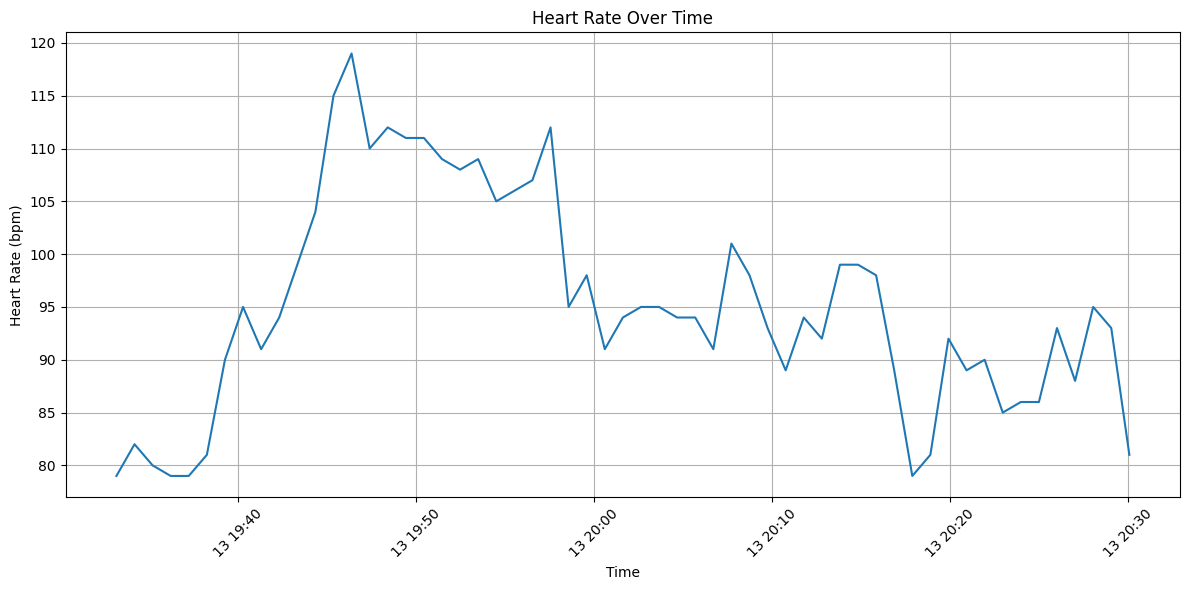

In [35]:
hr_granular_activity_event = physical_event_file['physical_health']['events']['activity_event'][0]['heart_rate']['hr_granular_data_array']

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hr_granular_activity_event]
heart_rates = [item['hr_bpm_int'] for item in hr_granular_activity_event]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(datetimes, heart_rates, linestyle='-')
plt.title('Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Intensity level

In [36]:
hr_data = physical_event_file['physical_health']['events']['activity_event'][0]['heart_rate']['hr_granular_data_array']
activity_start = datetime.fromisoformat(physical_event_file['physical_health']['events']['activity_event'][0]['activity']['activity_start_datetime_string'])

# Define the HR max and intensity categories
age = 20
hr_max = 220 - age
intensity_levels = [
    ('rest', 0, 0.5 * hr_max),
    ('low', 0.5 * hr_max, 0.6667 * hr_max),
    ('moderate', 0.6667 * hr_max, 0.8333 * hr_max),
    ('vigorous', 0.8333 * hr_max, hr_max)
]

# Initialize the intensity counters
intensity_durations = {level: 0 for level, _, _ in intensity_levels}

# Calculate durations and categorize
previous_datetime = activity_start
for entry in hr_data:
    current_datetime = datetime.fromisoformat(entry['datetime_string'])
    hr_bpm = entry['hr_bpm_int']
    
    # Calculate the time difference from the previous entry
    duration = (current_datetime - previous_datetime).total_seconds()
    
    # Categorize the HR bpm
    for level, lower_bound, upper_bound in intensity_levels:
        if lower_bound <= hr_bpm < upper_bound:
            intensity_durations[level] += duration
            break
    
    previous_datetime = current_datetime

# Calculate total duration
total_duration = sum(intensity_durations.values())

# Calculate the percentage of time spent in each intensity level
intensity_percentages_rounded = {level: round((duration / total_duration) * 100, 2) for level, duration in intensity_durations.items()}

# Create the final result with the total time in each level and the percentages
intensity_durations_hms = {level: str(timedelta(seconds=int(duration))) for level, duration in intensity_durations.items()}


# Create a DataFrame to present the results
df_result = pd.DataFrame({
    'Intensity Level': intensity_durations.keys(),
    'Total Time (HH:MM:SS)': intensity_durations_hms.values(),
    'Percentage (%)': intensity_percentages_rounded.values()
})

# Show the DataFrame
print(df_result)

  Intensity Level Total Time (HH:MM:SS)  Percentage (%)
0            rest               0:41:41           73.21
1             low               0:15:15           26.79
2        moderate               0:00:00            0.00
3        vigorous               0:00:00            0.00
